# Importing modules and Data

In [1]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# %ls   #files in current directory

In [3]:
df = pd.read_csv("data.csv")
print("Total number of dataset is {}".format(df.shape[0]))
df.drop_duplicates(keep='first', inplace=True)  # Remove duplicate entries if any
print("Total number of dataset after removing duplicates is {}".format(df.shape[0]))
df.head()

Total number of dataset is 30697
Total number of dataset after removing duplicates is 30697


,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


<b>No duplicates found </b>

# Preprocessing Data

## Data

In [4]:
df.columns

Index(['Unnamed: 0', 'match_event_id', 'location_x', 'location_y',
       'remaining_min', 'power_of_shot', 'knockout_match', 'game_season',
       'remaining_sec', 'distance_of_shot', 'is_goal', 'area_of_shot',
       'shot_basics', 'range_of_shot', 'team_name', 'date_of_game',
       'home/away', 'shot_id_number', 'lat/lng', 'type_of_shot',
       'type_of_combined_shot', 'match_id', 'team_id', 'remaining_min.1',
       'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1',
       'distance_of_shot.1'],
      dtype='object')

In [5]:
# drop some columns
df.drop('Unnamed: 0', inplace = True, axis = 1)
df.drop('match_event_id', inplace = True, axis = 1)
df.drop('match_id', inplace = True, axis = 1)
df.head()

,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,...,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,Right Side(R),...,1.0,"45.539131, -122.651648",shot - 30,NaN,1610612747,10.00,1.0,50.608,54.2000,38.0
1,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,Left Side(L),...,2.0,"45.539131, -122.651648",shot - 45,NaN,1610612747,10.00,1.0,28.800,22.0000,35.0
2,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,Left Side Center(LC),...,3.0,"45.539131, -122.651648",shot - 25,NaN,1610612747,92.64,1.0,0.000,63.7216,54.4
3,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,Right Side Center(RC),...,4.0,"45.539131, -122.651648",NaN,shot - 3,1610612747,NaN,1.0,122.608,52.0000,42.0
4,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,Center(C),...,5.0,"45.539131, -122.651648",NaN,shot - 1,1610612747,42.64,2.0,0.000,19.0000,20.0


In [6]:
df.is_goal

0        NaN
1        0.0
2        1.0
3        0.0
4        1.0
5        0.0
6        1.0
7        NaN
8        1.0
9        0.0
10       0.0
11       1.0
12       1.0
13       0.0
14       0.0
15       0.0
16       NaN
17       1.0
18       0.0
19       NaN
20       0.0
21       NaN
22       1.0
23       1.0
24       1.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
30667    0.0
30668    NaN
30669    0.0
30670    0.0
30671    0.0
30672    1.0
30673    0.0
30674    1.0
30675    0.0
30676    1.0
30677    0.0
30678    0.0
30679    NaN
30680    NaN
30681    NaN
30682    NaN
30683    0.0
30684    0.0
30685    0.0
30686    NaN
30687    NaN
30688    1.0
30689    0.0
30690    0.0
30691    0.0
30692    0.0
30693    NaN
30694    1.0
30695    0.0
30696    0.0
Name: is_goal, Length: 30697, dtype: float64

Some values are <span class="mark">missing</span> in <b> is_goal </b>. Since no outcome is known in this case <b> we will <i> remove </i>such cases </b>

In [7]:
# df.dropna(axis=0, how='any', subset=['is_goal'], inplace=True, )
# df.reset_index(inplace = True, drop = True)
# df.is_goal[:10]

## Report using pandas_profiling

In [8]:
# pandas_profiling.ProfileReport(df)
# This is one big report showing data types, variables, statistics, correltaion, missing values, etc.

## Based on above following observations are clear:  <br>
<b>shot_id_number is highly correlated with df_index (ρ = 1) <br>
team_id has constant value "1610612747" <br>
team_name has constant value "Manchester United" <br>
type_of_combined_shot has 12293 (50.3%) missing values <br>
type_of_shot has 12136 (49.7%) missing values <br>
So insted of filling missing values , drop it for such high missing percentage
</b>

In [9]:
# drop above mentioned columns
df.drop(['shot_id_number', 'team_id', 'team_name', 'type_of_combined_shot', 'type_of_shot'],
        axis=1, inplace=True)

## Filling missing values

In [10]:
df.isna().sum()

location_x            1461
location_y            1540
remaining_min         1562
power_of_shot         1486
knockout_match        1517
game_season           5862
remaining_sec         1594
distance_of_shot      1567
is_goal               6268
area_of_shot          1502
shot_basics           1575
range_of_shot         1564
date_of_game          1550
home/away             1497
lat/lng               1565
remaining_min.1       1535
power_of_shot.1       1539
knockout_match.1      1493
remaining_sec.1       1539
distance_of_shot.1    1568
dtype: int64

In [11]:
location_x_replacement = df.location_x.mode()
location_y_replacement = df.location_y.mode()

df['location_x'].fillna(value=location_x_replacement[0], inplace=True) # zero has occured in more than 15% cases
df['location_y'].fillna(value=location_y_replacement[0], inplace=True) # zero has occured in more than 15% cases

In [12]:
df[['remaining_sec', 'remaining_sec.1']].head(10)

,remaining_sec,remaining_sec.1
0,27.0,54.2000
1,22.0,22.0000
2,45.0,63.7216
3,52.0,52.0000
4,19.0,19.0000
5,32.0,NaN
6,52.0,112.2000
7,5.0,5.0000
8,12.0,12.0000
9,36.0,52.2000


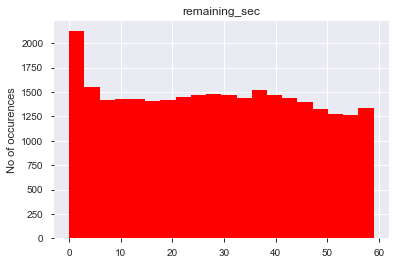

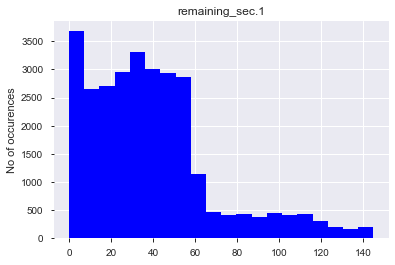

In [13]:
plt.hist(df['remaining_sec'], bins=20,  color='red')
plt.title(label = 'remaining_sec', loc='center')
plt.ylabel('No of occurences')
plt.show()

plt.hist(df['remaining_sec.1'], bins=20, color='blue')
plt.ylabel('No of occurences')
plt.title(label = 'remaining_sec.1', loc='center')
plt.show()

In [14]:
# remaining_sec makes more sense as number of seconds should be <=60
df.drop('remaining_sec.1', axis=1, inplace=True)

# for continous values in following cases let us use mean
df.remaining_sec.fillna(value=df.remaining_sec.mean(), inplace=True, limit=None)

In [15]:
# On the same lines of remaining_sec for remainig_min
df.drop('remaining_min.1', axis=1, inplace=True )

# Fill missing values using mean
df.remaining_min.fillna(value=df.remaining_min.mean(), inplace=True, limit=None) 

In [16]:
# for power_of_shot lets see description first
print(df.power_of_shot.describe())
df.power_of_shot[:20]

count    29211.000000
mean         2.519359
std          1.153976
min          1.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          7.000000
Name: power_of_shot, dtype: float64


0     1.0
1     1.0
2     1.0
3     1.0
4     2.0
5     3.0
6     NaN
7     3.0
8     3.0
9     3.0
10    3.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    2.0
18    3.0
19    3.0
Name: power_of_shot, dtype: float64

In [17]:
# for power_of_shot.1 lets see description first
print(df['power_of_shot.1'].describe())
df['power_of_shot.1'][:20]

count    29158.000000
mean        15.994109
std         29.676815
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max        118.360000
Name: power_of_shot.1, dtype: float64


0      1.00
1      1.00
2      1.00
3      1.00
4      2.00
5      3.00
6      3.00
7      3.00
8      3.00
9      3.00
10     3.00
11     1.00
12    77.36
13    68.36
14     1.00
15    70.36
16     1.00
17     2.00
18     3.00
19    70.36
Name: power_of_shot.1, dtype: float64

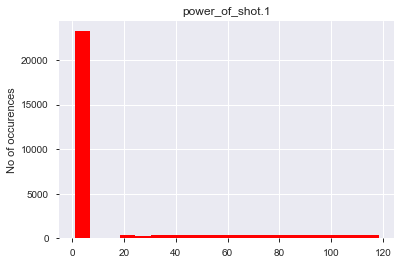

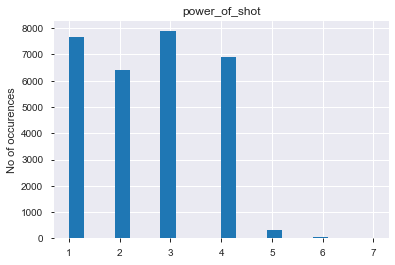

In [18]:
plt.hist(df['power_of_shot.1'], bins=20,  color='red')
plt.title(label='power_of_shot.1', loc='center')
plt.ylabel('No of occurences')
plt.show()

plt.hist(df['power_of_shot'], bins=20, label='power_of_shot')
plt.title(label='power_of_shot', loc='center')
plt.ylabel('No of occurences')
plt.show()

In [19]:
# Since after power_of_shot =5  the majority of values are very less in number
#and values are also same for lower power of shot, hence we can safely drop 'power_of_shot.1'
df.drop('power_of_shot.1', axis=1, inplace=True)

# For power_of_shot Since it is a categorical variable lets use mode
power_of_shot_replacement = df.power_of_shot.mode()
df.power_of_shot.fillna(value = power_of_shot_replacement[0], inplace = True, limit = None)

In [20]:
area_of_shot_replacement = df.area_of_shot.mode()
shot_basics_replacement = df.shot_basics.mode()
range_of_shot_replacement = df.range_of_shot.mode()

df.area_of_shot.fillna(value = area_of_shot_replacement[0], inplace = True, limit = None)
df.shot_basics.fillna(value = shot_basics_replacement[0], inplace = True, limit = None)
df.range_of_shot.fillna(value = range_of_shot_replacement[0], inplace = True, limit = None)

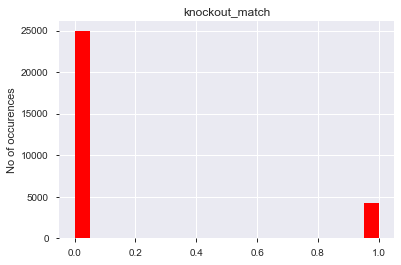

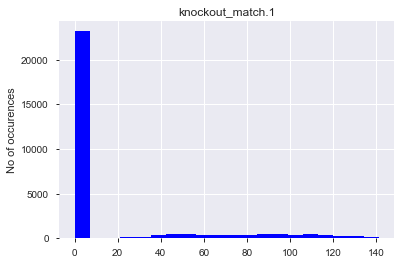

In [21]:
plt.hist(df['knockout_match'], bins=20,  color='red')
plt.title(label = 'knockout_match', loc='center')
plt.ylabel('No of occurences')
plt.show()

plt.hist(df['knockout_match.1'], bins=20, color='blue')
plt.ylabel('No of occurences')
plt.title(label = 'knockout_match.1', loc='center')
plt.show()

In [22]:
# Since after knockout_match.1 =1,   the majority of values are very less in number
#hence we can safely drop 'knockout_match.1'
df.drop('knockout_match.1', axis=1, inplace=True)

# Fill missing values of knockout_match
knockout_match_replacement = df.knockout_match.mode()
df.knockout_match.fillna(value = knockout_match_replacement[0], inplace = True, limit = None)

In [23]:
# Analyze home/away variable
print(df['home/away'][:10])

0    MANU @ POR
1    MANU @ POR
2           NaN
3    MANU @ POR
4    MANU @ POR
5    MANU @ POR
6    MANU @ POR
7    MANU @ POR
8    MANU @ POR
9    MANU @ POR
Name: home/away, dtype: object


<b> @ </b> suggests  game <b> away </b> while <b> v/s </b> suggests game <b> home </b>

In [24]:
# lets change the home/away such that for @ value is 0 and for v/s value is 1
import re
pattern= '@'
def home_away_to_categorical(text):
    if type(text)==float: # To handle NaN cases -> type is float category
        return None
    elif re.search(pattern, text):
        return 0
    else:return 1
    
df['home/away'] = df['home/away'].apply(lambda x : home_away_to_categorical(x))

In [25]:
# For missing cases let's fill with mode 
home_away_replacement = df['home/away'].mode()
df['home/away'].fillna(value = home_away_replacement[0], inplace = True, limit = None)

# Since we have home/away feature we don't really need lat/lng feature
#as both will be telling same story. Hence drop lat/long feature
df.drop(['lat/lng'], axis = 1, inplace = True)

In [26]:
# Analysis for date of game and game_season 
df[['date_of_game', 'game_season']].head(10)

,date_of_game,game_season
0,2000-10-31,2000-01
1,2000-10-31,2000-01
2,2000-10-31,2000-01
3,2000-10-31,2000-01
4,2000-10-31,2000-01
5,2000-10-31,NaN
6,2000-10-31,2000-01
7,2000-10-31,2000-01
8,2000-10-31,2000-01
9,2000-10-31,2000-01


In [27]:
# To fill missing value in this case we will use ffill method
# (forward fill) -> propagate last valid observation forward to next valid
df['date_of_game'].fillna(method = 'ffill', inplace = True, limit = None)
df['game_season'].fillna(method = 'ffill', inplace = True, limit = None)

date_of_game in current format is not able to give anything significant. <br>
<b> we will split to get month and year out of it. Then we will replace current values in game_season by year

In [28]:
import re
pattern = '-'
def date_to_year(date):
    temp = re.split(pattern, date)
    return int(temp[0])
def date_to_month(date):
    temp = re.split(pattern, date)
    return int(temp[1])
df['game_season'] = df['date_of_game'].apply(lambda x : date_to_year(x))
df['date_of_game'] = df['date_of_game'].apply(lambda x : date_to_month(x))
df.rename(columns={"date_of_game": "month_of_game"},  inplace = True)

<b>Finally analyze distance_of_shot and distance_of_shot.1</b>


In [29]:
df[['distance_of_shot', 'distance_of_shot.1']].head(10)

,distance_of_shot,distance_of_shot.1
0,38.0,38.0
1,35.0,35.0
2,36.0,54.4
3,42.0,42.0
4,20.0,20.0
5,34.0,34.0
6,20.0,89.4
7,22.0,22.0
8,32.0,32.0
9,32.0,NaN


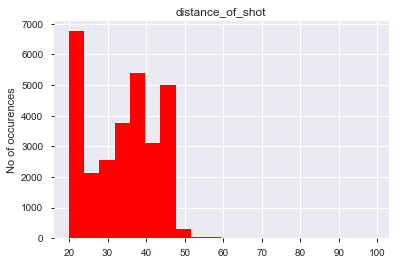

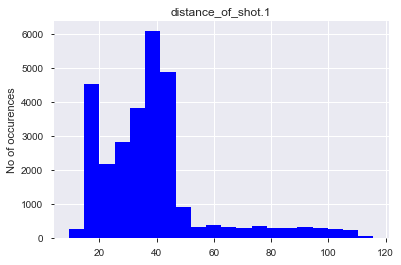

In [30]:
plt.hist(df['distance_of_shot'], bins=20,  color='red')
plt.title(label = 'distance_of_shot', loc='center')
plt.ylabel('No of occurences')
plt.show()
plt.hist(df['distance_of_shot.1'], bins=20, color='blue')
plt.ylabel('No of occurences')
plt.title(label = 'distance_of_shot.1', loc='center')
plt.show()

In [31]:
# both of them is almost same, we can take one df['distance_of_shot'] and drop other
df.drop('distance_of_shot.1', axis = 1, inplace = True)

# Fill missing value in distance_of_shot
df.distance_of_shot.fillna(value = df['distance_of_shot'].mean(), inplace = True)

In [32]:
# Final check for missing Values
df.isnull().sum()

location_x             0
location_y             0
remaining_min          0
power_of_shot          0
knockout_match         0
game_season            0
remaining_sec          0
distance_of_shot       0
is_goal             6268
area_of_shot           0
shot_basics            0
range_of_shot          0
month_of_game          0
home/away              0
dtype: int64

<b> Perfect !

# Categorical Data and Visualizations

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30697 entries, 0 to 30696
Data columns (total 14 columns):
location_x          30697 non-null float64
location_y          30697 non-null float64
remaining_min       30697 non-null float64
power_of_shot       30697 non-null float64
knockout_match      30697 non-null float64
game_season         30697 non-null int64
remaining_sec       30697 non-null float64
distance_of_shot    30697 non-null float64
is_goal             24429 non-null float64
area_of_shot        30697 non-null object
shot_basics         30697 non-null object
range_of_shot       30697 non-null object
month_of_game       30697 non-null int64
home/away           30697 non-null float64
dtypes: float64(9), int64(2), object(3)
memory usage: 3.5+ MB


In [34]:
# Using Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

area_of_shot_fit = le.fit(df.area_of_shot)
df['area_of_shot'] = area_of_shot_fit.transform(df['area_of_shot'])

shot_basics_fit = le.fit(df.shot_basics)
df['shot_basics'] = shot_basics_fit.transform(df['shot_basics'])

range_of_shot_fit = le.fit(df.range_of_shot)
df['range_of_shot'] = range_of_shot_fit.transform(df['range_of_shot'])

In [ ]:
# df.style.background_gradient(cmap='Blues')
# sns.set()
# ax = sns.heatmap(df, annot=True)

Text(0, 0.5, 'Class count')

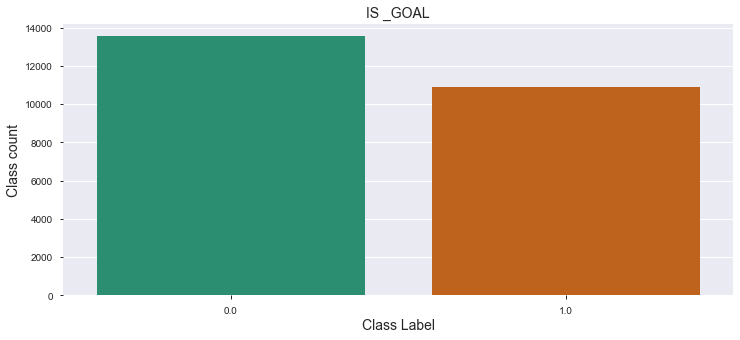

In [35]:
plt.figure(figsize=(12,5))
sns.countplot(x=df.is_goal, palette="Dark2")
plt.title('IS _GOAL', fontsize=14)
plt.xlabel('Class Label', fontsize=14)
plt.ylabel('Class count', fontsize=14)

In [36]:
df.is_goal.mean()

0.4453313684555242

<b> Data is roughly balanced.

In [38]:
nonempty_is_goal = df.dropna(axis=0, how='any', subset=['is_goal'])
empty_is_goal = df[~df.index.isin(nonempty_is_goal.index)]
df.dropna(axis=0, how='any', subset=['is_goal'], inplace=True )
# df.reset_index(inplace = True, drop = True)
# df.is_goal[:10]

In [42]:
only_na

,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,month_of_game,home/away
0,167.0,72.0,10.000000,1.0,0.0,2000,27.000000,38.0,NaN,5,4,0,10,0.0
7,1.0,28.0,8.000000,3.0,0.0,2000,5.000000,22.0,NaN,0,0,4,10,0.0
16,0.0,0.0,0.000000,1.0,0.0,2000,1.000000,20.0,NaN,0,0,4,11,1.0
19,0.0,0.0,10.000000,3.0,0.0,2000,46.000000,20.0,NaN,0,4,4,11,1.0
21,134.0,127.0,9.000000,3.0,0.0,2000,4.000000,38.0,NaN,4,4,0,11,1.0
32,163.0,76.0,11.000000,1.0,0.0,2000,26.000000,37.0,NaN,5,4,0,11,0.0
33,70.0,194.0,10.000000,1.0,0.0,2000,58.000000,40.0,NaN,4,4,0,11,0.0
34,1.0,19.0,7.000000,1.0,0.0,2000,33.000000,21.0,NaN,0,0,4,11,0.0
35,-12.0,0.0,5.000000,1.0,0.0,2000,58.000000,21.0,NaN,0,0,4,11,0.0
36,1.0,4.0,4.000000,1.0,0.0,2000,9.000000,20.0,NaN,0,0,4,11,0.0


In [43]:
from sklearn.model_selection import train_test_split
df_dependent = df[['is_goal']]
df_independent = df.drop('is_goal', axis=1, inplace = False)
x_train, x_test, y_train, y_test = train_test_split(
    df_independent, df_dependent, test_size = 0.2, random_state = 10)

# Training Models

## Logistic regression

In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


model_logisticRegression=Pipeline(steps=[('scalar', StandardScaler()),
                                         ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])
scores=cross_val_score(model_logisticRegression, x_train, y_train, cv=10, scoring='accuracy')
print('Accuracy for Logistic Regression= ', scores.mean())

In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split

model_randomForest=Pipeline(steps=[('random_forest', RandomForestClassifier())])
scores=cross_val_score(model_randomForest, x_train, y_train, cv=10, scoring='accuracy')
print('Accuracy for Random Forest = ', scores.mean())

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
param = {'n_estimators' : [10, 150, 300],
         'max_depth' : [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv = 5, n_jobs =-1, verbose=1) #n_jobs = -1 for parallelizing search
gs_fit = gs.fit( x_train, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False).head()

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.4min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,8.575737,0.131050,0.467493,0.121574,30,300,"{'max_depth': 30, 'n_estimators': 300}",0.597339,0.578665,0.585060,0.587001,0.581883,0.585990,0.006344,1
5,9.282805,0.305473,0.471013,0.102652,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.597084,0.576618,0.587107,0.584186,0.584442,0.585888,0.006599,2
8,11.873221,0.237614,0.722331,0.185736,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.597084,0.575083,0.587618,0.581627,0.587513,0.585785,0.007292,3
1,4.216081,0.133670,0.235919,0.037558,30,150,"{'max_depth': 30, 'n_estimators': 150}",0.594781,0.579432,0.585060,0.587769,0.577277,0.584864,0.006227,4
7,4.907711,0.904115,0.211673,0.015716,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.592991,0.576874,0.587618,0.582139,0.582395,0.584404,0.005476,5


In [ ]:
y_pred = gs_fit.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true=y_test, y_pred=y_pred )

## ANN

In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, train_test_split
model_mlp=Pipeline(steps=[('scaler', StandardScaler()),
                         ('mlp_classifier', MLPClassifier(hidden_layer_sizes=(1275, 637)))])
scores=cross_val_score(model_mlp, x_train, y_train, cv=10, scoring='accuracy')
print('Accuracy for ANN Classifier: ', scores.mean())

# Store Answer

In [49]:
# df_dependent1 = empty_is_goal[['is_goal']]
df_independent1 = empty_is_goal.drop('is_goal', axis=1, inplace = False)
temp = gs_fit.predict_proba(df_independent1)[0]
result = pd.DataFrame(temp, columns={'zero_prob', 'one_prob'})
result.drop('zero_prob', axis=1, inplace=True )
temp = pd.DataFrame(empty_is_goal.index, columns={'indexing'})
result['shot_id_number'] = lassan['indexing'].apply(lambda x : x+1)

In [81]:
result.to_csv('/Users/anurag/Downloads/submission1.csv')